In [1]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [2]:
library(caret)

Loading required package: ggplot2

Loading required package: lattice



In [3]:
hp_data <- read.csv('/content/bengaluru_house_prices.csv')

In [4]:
sum(is.na(hp_data))

[1] 682

In [5]:
hp_data

area_type,availability,location,size,society,total_sqft,bath,balcony,price
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120.00
Built-up Area,Ready To Move,Uttarahalli,3 BHK,,1440,2,3,62.00
Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95.00
Super built-up Area,Ready To Move,Kothanur,2 BHK,,1200,2,1,51.00
Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2,1,38.00
Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4,NA,204.00
Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4,NA,600.00
Super built-up Area,Ready To Move,Marathahalli,3 BHK,,1310,3,1,63.25


In [6]:
hp_data$balcony[is.na(hp_data$balcony)] <- 0

In [7]:
hp_data$bath[is.na(hp_data$bath)] <- 0

In [8]:
hp_data$price[is.na(hp_data$price)] <- 0

In [9]:
str(hp_data)

'data.frame':	13320 obs. of  9 variables:
 $ area_type   : chr  "Super built-up  Area" "Plot  Area" "Built-up  Area" "Super built-up  Area" ...
 $ availability: chr  "19-Dec" "Ready To Move" "Ready To Move" "Ready To Move" ...
 $ location    : chr  "Electronic City Phase II" "Chikka Tirupathi" "Uttarahalli" "Lingadheeranahalli" ...
 $ size        : chr  "2 BHK" "4 Bedroom" "3 BHK" "3 BHK" ...
 $ society     : chr  "Coomee " "Theanmp" "" "Soiewre" ...
 $ total_sqft  : chr  "1056" "2600" "1440" "1521" ...
 $ bath        : num  2 5 2 3 2 2 4 4 3 6 ...
 $ balcony     : num  1 3 3 1 1 1 0 0 1 0 ...
 $ price       : num  39.1 120 62 95 51 ...


In [10]:
sum(is.na(hp_data))

[1] 0

In [11]:
hp_data <- subset(hp_data, select = -area_type)

In [12]:
hp_data$size <- gsub("Bedroom", "BHK", hp_data$size)

In [13]:
hp_data$total_sqft <- as.numeric(hp_data$total_sqft)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [14]:
hp_data <- subset(hp_data, select = -society)

In [26]:
sum(is.na(hp_data$total_sqft))

[1] 247

In [27]:
hp_data$total_sqft <- as.numeric(hp_data$total_sqft)

In [28]:
hp_data$total_sqft[is.na(hp_data$total_sqft)] <- 0

In [29]:
replace_range_with_mean <- function(range_string) {
  # Convert range string to character
  range_string <- as.character(range_string)

  # Split the range string into minimum and maximum values
  range_values <- as.numeric(unlist(strsplit(range_string, " - ")))

  # Calculate the mean of the range values
  mean_value <- mean(range_values)

  # Return the mean value
  return(mean_value)
}

In [30]:
means <- sapply(hp_data$total_sqft, replace_range_with_mean)

In [31]:
hp_data$total_sqft <- means

In [15]:
hp_data


,availability,location,size,total_sqft,bath,balcony,price
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,19-Dec,Electronic City Phase II,2 BHK,1056,2,1,39.07
2,Ready To Move,Chikka Tirupathi,4 BHK,2600,5,3,120.00
3,Ready To Move,Uttarahalli,3 BHK,1440,2,3,62.00
4,Ready To Move,Lingadheeranahalli,3 BHK,1521,3,1,95.00
5,Ready To Move,Kothanur,2 BHK,1200,2,1,51.00
6,Ready To Move,Whitefield,2 BHK,1170,2,1,38.00
7,18-May,Old Airport Road,4 BHK,2732,4,0,204.00
8,Ready To Move,Rajaji Nagar,4 BHK,3300,4,0,600.00
9,Ready To Move,Marathahalli,3 BHK,1310,3,1,63.25


In [32]:
set.seed(123) # for reproducibility
train <- createDataPartition(hp_data$price, p = 0.8, list = FALSE)
train_data <- hp_data[train, ]
test_data <- hp_data[-train, ]

In [33]:
model <- lm(price ~ ., data = train_data)

In [34]:
summary(model)


Call:
lm(formula = price ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1461.60   -17.16     0.00    14.93  1877.56 

Coefficients: (5 not defined because of singularities)
                                                             Estimate
(Intercept)                                                -1.346e+02
availability15-Jun                                          1.148e+01
availability15-Oct                                          5.578e+01
availability16-Dec                                          3.869e+01
availability16-Jan                                         -4.365e+01
availability16-Jul                                         -4.890e+01
availability16-Mar                                          6.546e+01
availability16-Nov                                          6.628e+01
availability16-Oct                                          9.155e+01
availability16-Sep                                         -2.087e+01
availability17-Apr  

In [35]:
data1 <- data.frame(availability = 'Ready To Move',location = "Whitefield", size = '4 BHK', total_sqft	 = 1521, bath = 3, balcony = 1)

In [36]:
prediction_price <- predict(model, data1)

In [37]:
prediction_price

1 
196.5328

Warning message:
“not plotting observations with leverage one:
  9, 41, 48, 66, 105, 166, 178, 182, 202, 256, 259, 265, 299, 338, 342, 371, 427, 432, 445, 478, 504, 553, 565, 673, 678, 721, 784, 827, 832, 856, 888, 889, 893, 910, 914, 931, 960, 987, 1084, 1086, 1120, 1131, 1133, 1148, 1158, 1202, 1238, 1245, 1247, 1263, 1268, 1298, 1312, 1327, 1334, 1343, 1356, 1413, 1456, 1458, 1463, 1484, 1486, 1508, 1513, 1576, 1604, 1613, 1675, 1677, 1685, 1769, 1774, 1819, 1867, 1881, 1897, 1906, 1954, 1998, 2000, 2033, 2096, 2141, 2149, 2159, 2180, 2187, 2271, 2287, 2321, 2323, 2341, 2353, 2358, 2359, 2373, 2374, 2406, 2445, 2456, 2461, 2474, 2479, 2482, 2495, 2500, 2510, 2603, 2618, 2628, 2650, 2660, 2690, 2770, 2778, 2799, 2814, 2847, 2849, 2850, 2875, 2877, 2952, 2954, 2955, 2969, 3011, 3047, 3080, 3091, 3100, 3103, 3117, 3144, 3166, 3194, 3196, 3207, 3245, 3291, 3420, 3425, 3478, 3497, 3522, 3574, 3578, 3581, 3623, 3653, 3694, 3715, 3798, 3814, 3829, 3865, 3959, 4027, 4044, 4064, 4097, 4098, 

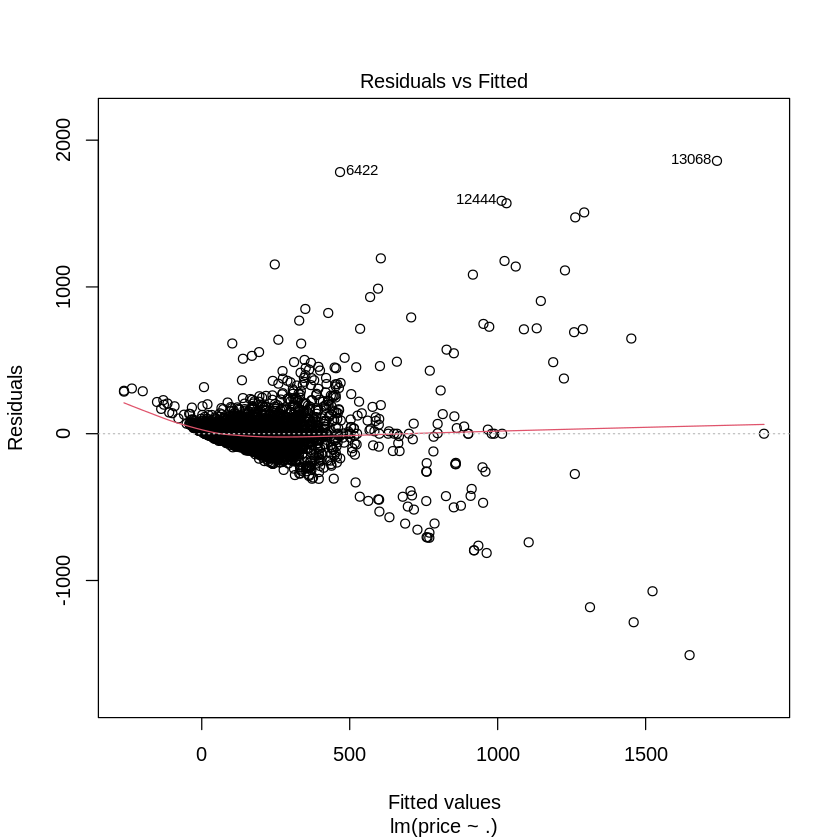

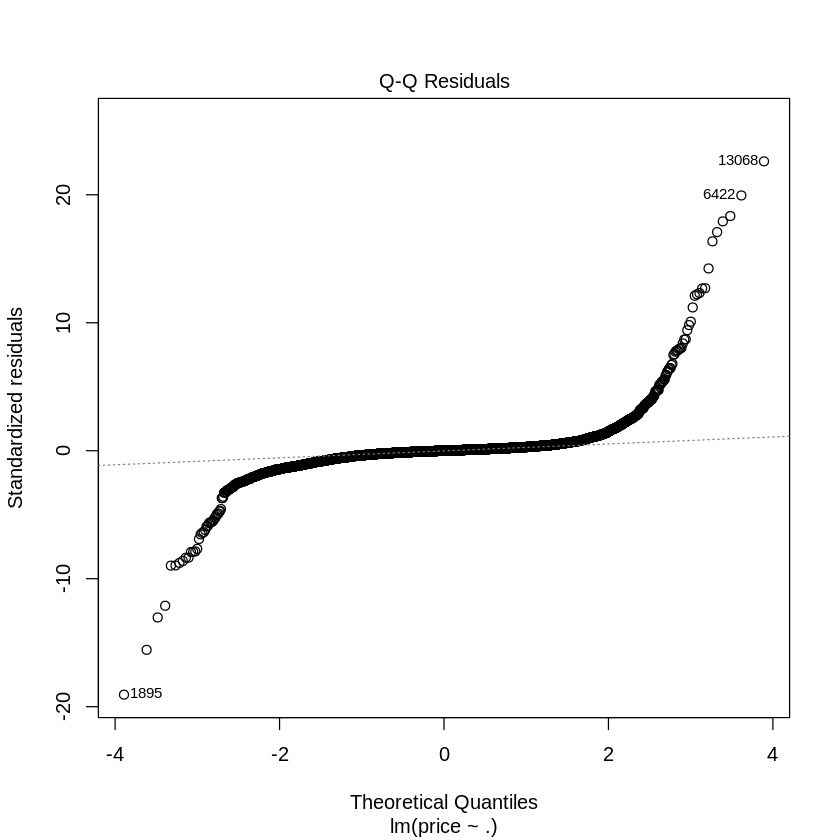

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


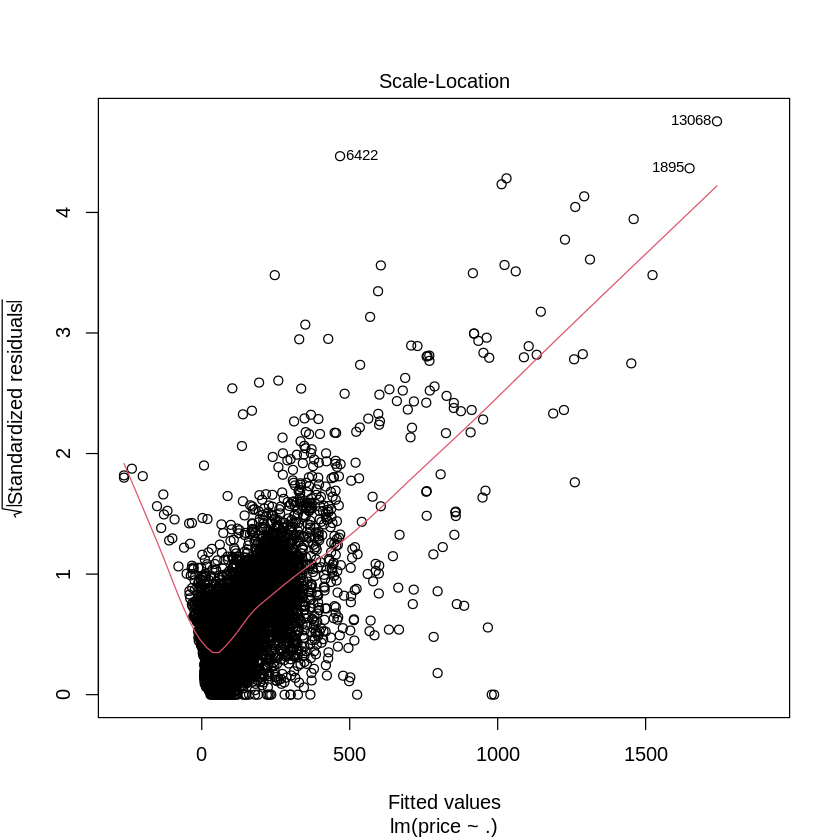

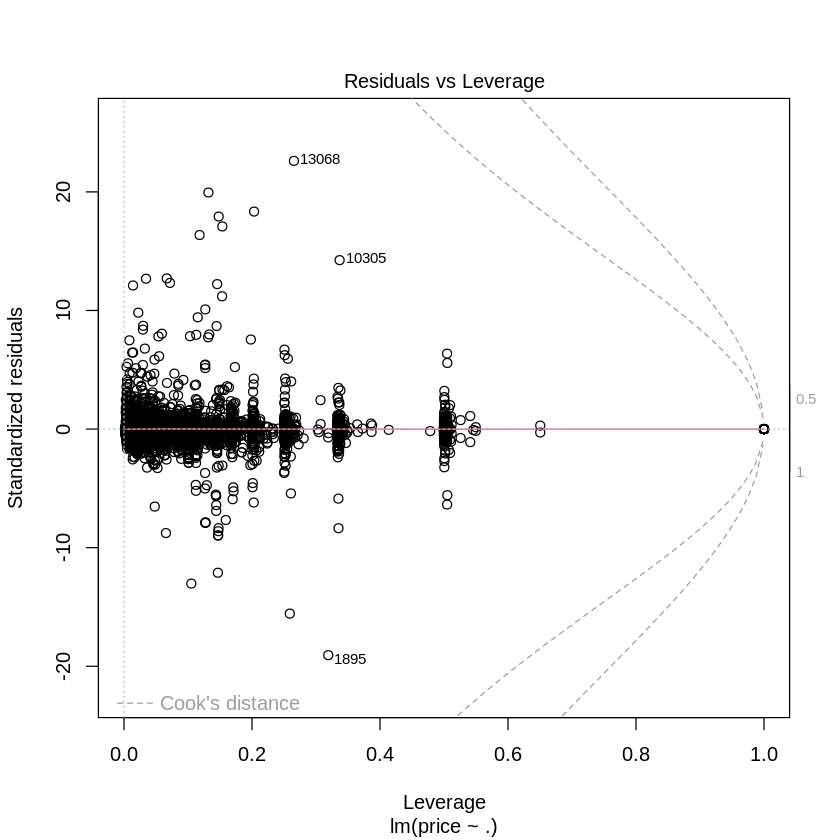

In [25]:
plot(model)